## Demonstrate economic indicators that affect Kora's GDP

In [1]:
# import essential liabraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline


### Load the dataset

In [2]:
# loading data from excel file
df = pd.read_excel('korea_data.xlsx', index_col='Year')

# change the columns names
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

df = df.rename(columns=column_names)

# replace '..' as nan
df = df.replace('..', np.nan)

# change the datatype
df.astype('float64')

df.head()

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


In [3]:
# drop the data in 2017
df = df.drop(index=2017)

df.tail()

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
2012,2.292398,31.001229,0.525714,9.6,4.806465,2.246066,3.374311,-2.299833,1.923148,3.2
2013,2.896205,29.102217,0.455219,8.6,4.638891,2.191130,3.261377,-0.118665,1.882099,3.1
2014,3.341448,29.276910,0.628150,8.6,8.144493,2.042800,3.046199,5.262495,1.747117,3.5
2015,2.790236,28.918112,0.527288,8.6,8.190748,2.385188,2.988499,7.297390,2.203974,3.6
2016,2.929305,29.252387,0.451318,7.9,7.123156,2.981150,4.477185,5.610214,2.525765,3.7


## Check for perfect multicollinearity

### showing correlation matrix in a heatmap

<AxesSubplot:>

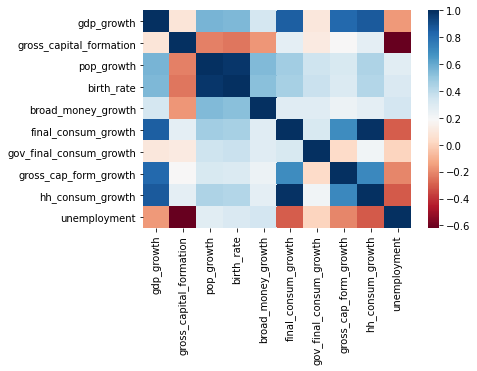

In [4]:
# show correlation matrix in a heatmap
corr = df.corr()

sns.heatmap(corr, cmap='RdBu', xticklabels=corr.columns, yticklabels=corr.index)

### using VIF

In [5]:
# first step is to add constant
X1 = sm.tools.add_constant(df)

# a series that lists out the VIF of each variable
vif_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

vif_before


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

In [6]:
# drop variables have VIF greater than 5 and highly correlated together
df_after = df.drop(columns=[
    'gdp_growth', 
    'birth_rate', 
    'final_consum_growth', 
    'gross_capital_formation']
    )
df_after.head()

,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,
1969,2.263434,60.984733,10.640799,29.908118,10.700325,4.86
1970,2.184174,27.422864,7.279573,0.058667,10.557300,4.51
1971,1.971324,20.844481,8.610547,15.172870,9.426969,4.57
1972,1.875999,33.815028,8.134824,-13.056701,5.471355,4.59
1973,1.768293,36.415629,2.287729,32.098276,8.927295,4.04


In [7]:
X2 = sm.tools.add_constant(df_after)

vif_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
vif_after

const                      27.891150
pop_growth                  1.971299
broad_money_growth          1.604644
gov_final_consum_growth     1.232229
gross_cap_form_growth       2.142992
hh_consum_growth            2.782698
unemployment                1.588410
dtype: float64

## Describe the dataset

In [8]:
desc_df = df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + desc_df.loc['std'] * 3
desc_df.loc['-3_std'] = desc_df.loc['mean'] - desc_df.loc['std'] * 3

desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [9]:
# remove the variables that have a Z-score over 3
df_remove = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df.index.difference(df_remove.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

no need to remove the outliners because there was a finanical crisis in 1998 and Dotcom Bubble in 2001.  
these are all real economic impact but not the error values

## Build up the model

In [10]:
# drop variables with high VIF
df_after = df.drop(columns=
    [
        'birth_rate',
        'final_consum_growth',
        'gross_capital_formation'
    ]
)

# define the input variables
X = df_after.drop(columns='gdp_growth')
y = df_after[['gdp_growth']]

# splot X and Y in to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create a linear regression model object
model = LinearRegression()

# pass through the X_train and y_train dataset
model.fit(X_train, y_train)

LinearRegression()

### Analyse the output

In [11]:
intercept = model.intercept_[0]
coef = model.coef_[0]

print(f'The intercept of the model is {intercept:.2f}')
print('-'*100)

for cf in zip(X.columns, coef):
    print(f'The coefficient for {cf[0]} is: {cf[1]:.2}')

The intercept of the model is 2.08
----------------------------------------------------------------------------------------------------
The coefficient for pop_growth is: 2.0
The coefficient for broad_money_growth is: -0.0017
The coefficient for gov_final_consum_growth is: -0.21
The coefficient for gross_cap_form_growth is: 0.14
The coefficient for hh_consum_growth is: 0.51
The coefficient for unemployment is: 0.027


In [12]:
# get the predictions
y_predict = model.predict(X_test)
y_predict

array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324],
       [ 5.13377964],
       [10.22772664],
       [10.2048022 ],
       [ 3.30365173],
       [ 7.69074121]])

In [29]:
df_predict = pd.DataFrame(index=X_test.index)

df_predict['y_test'] = y_test
df_predict['y_predict'] = y_predict

df_predict

,y_test,y_predict
Year,,
2002,7.432434,7.613175
1992,6.175506,6.313441
2007,5.463396,5.068187
2005,3.923677,4.198699
1971,10.454693,11.118853
1972,7.150715,5.133780
2000,8.924426,10.227727
1995,9.570604,10.204802
2013,2.896205,3.303652


### Rebuild the model by using statsmodels.api

In [13]:
X2 = sm.add_constant(X)

sm_model = sm.OLS(y, X2)

results = sm_model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     57.17
Date:                Thu, 06 May 2021   Prob (F-statistic):           2.36e-18
Time:                        11:40:46   Log-Likelihood:                -82.903
No. Observations:                  48   AIC:                             179.8
Df Residuals:                      41   BIC:                             192.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.9436      1.123      1.732      0.091      -0.323       4.211
pop_growth                  2.1819      0.587      3.719      0.001       0.997       3.367
broad_money_growth         -0.0004      0.018     -0.021      0.983      -0.038       0.037
gov_final_consum_growth    -0.1888      0.091     -2.076      0.044      -0.372      -0.005
gross_cap_form_growth       0.1293      0.025      5.195      0.000       0.079       0.180
hh_consum_growth            0.4968      0.085      5.862      0.000       0.326       0.668
unemployment               -0.0058      0.279     -0.021      0.984      -0.570       0.559
==============================================================================
Omnibus:                        0.820   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.658
Skew:                           0.281   Prob(JB):                        0.720
Kurtosis:                       2.881   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Testing for heteroscedasticity

In [14]:
_, p_value, _, f_pvalue = diag.het_white(results.resid, results.model.exog)
print('The p-value of the White test is:', p_value)
print('The f statistic of the p-value is:', f_pvalue)
print('-'*100)

_, p_value, _, f_pvalue = diag.het_breuschpagan(results.resid, results.model.exog)
print('The p-value of the Breuuscehpagan test is:', p_value)
print('The f statistic of the p-value is:', f_pvalue)

The p-value of the White test is: 0.43365711028668774
The f statistic of the p-value is: 0.509081191858685
----------------------------------------------------------------------------------------------------
The p-value of the Breuuscehpagan test is: 0.2518364670120158
The f statistic of the p-value is: 0.2662794557854001


both tests result in p-values that are significantly higher than 5%, which means the null hypothesis of no heteroscedasticity **failed to be rejected** in both cases.

#### Testing for autocorrelation

In [15]:
# compute the lags
lag = min(10, (len(X) // 5))

# perform Ljung box test for autocorrelation
diag.acorr_ljungbox(results.resid, lags=lag, return_df=True)

,lb_stat,lb_pvalue
1,1.978461,0.159553
2,2.058403,0.357292
3,2.058891,0.560274
4,2.618092,0.623622
5,3.605598,0.607473
6,4.309855,0.634823
7,5.323944,0.620495
8,7.288547,0.505845
9,8.522060,0.482507


as the Ljung-Box test shows that all of the p-values are significantly greater than 5%, the null hypothesis of no autocorrelation failed to be rejected

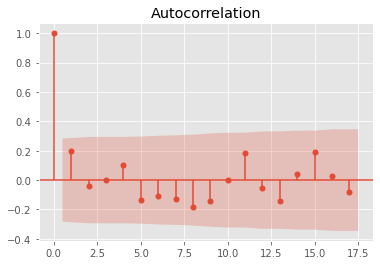

In [16]:
# plot the autocorrelation
plt.style.use('ggplot')

sm.graphics.tsa.plot_acf(results.resid)
plt.show()